<a href="https://colab.research.google.com/github/GabrielMV07/Cart-rio-EBAC/blob/main/ProjetoM7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive

MEDIA
                     Categoria  Preco_Normal
1          comidas-preparadas   3095.043478
5                     lacteos   2385.219239
2                  congelados   2108.042553
0  belleza-y-cuidado-personal   1783.556485
3                      frutas   1724.473684
6                    verduras   1343.296875
4        instantaneos-y-sopas    765.491228

MEDIANA
                      Categoria  Preco_Normal
1          comidas-preparadas        3290.0
0  belleza-y-cuidado-personal        1569.0
2                  congelados        1519.0
3                      frutas        1195.0
6                    verduras        1180.0
5                     lacteos         989.0
4        instantaneos-y-sopas         439.0

DESVIO PADRÃO
 Categoria
belleza-y-cuidado-personal    2210.041719
comidas-preparadas            2019.911428
congelados                    2111.539896
frutas                        1639.151114
instantaneos-y-sopas          1170.232869
lacteos        

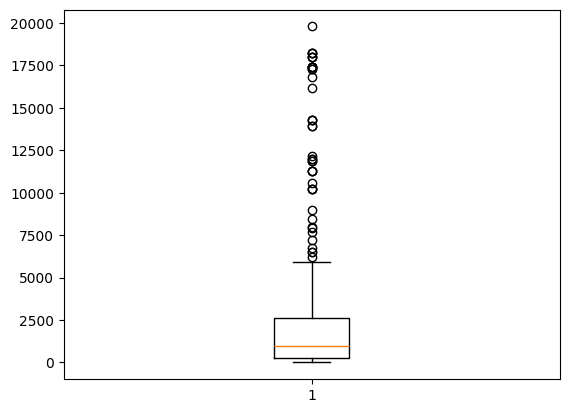

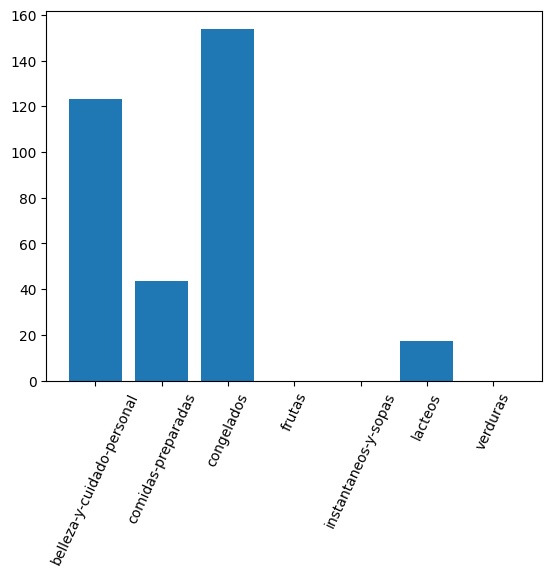

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from google.colab import drive

drive.mount('/content/drive' , force_remount=True)

cm = '/content/drive/MyDrive/Curso/projetofinal.csv'

df = pd.read_csv(cm)

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.

media_preco = df.groupby ('Categoria') ['Preco_Normal'].mean().reset_index().sort_values(by='Preco_Normal' ,
                                                                                          ascending=False)
print('\nMEDIA\n' , media_preco)


mediana_preco = df.groupby ('Categoria') ['Preco_Normal'].median().reset_index().sort_values(by='Preco_Normal' ,
                                                                                          ascending=False)
print('\nMEDIANA\n ' , mediana_preco)

# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.
# R) os produtos lacteos possuem uma media muito acima da mediana

# 2 - Traga o desvio padrão por categoria de produto.

desvio = df.groupby ('Categoria')['Preco_Normal'].std()

print('\nDESVIO PADRÃO\n' , desvio , '\n')

# Qual o comportamento da média e mediana nas categorias com maior desvio?
# R) a media esta muito acima da mediana nesses casos

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão.

plt.boxplot(df.loc[df['Categoria'] == 'lacteos' , 'Preco_Normal'])
plt.show()
print('\n')

# Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?
# R) existem diversos outliers variando entre 6 mil e 20 mil

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

plt.bar(df.groupby('Categoria')['Desconto'].mean().index , df.groupby('Categoria')['Desconto'].mean().values)
plt.xticks(rotation=65)
plt.show()
print('\n')

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

grupo = (df.groupby(['Categoria', 'Marca'])['Desconto'].mean().reset_index())


fig = px.bar(grupo, x="Categoria", y="Desconto", color="Marca", barmode="group")

fig.show()
